In [1]:
# load libraries
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#%% import data
columns=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=columns, 
                   sep='\t+', engine='python')
target = data['target'].values
label_names = {1:'Kama', 2:'Rosa', 3:'Canadian'}
data = data[data.columns[:-1]]
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values


# Batch X Random Training

In [3]:
#%% check QE 
som_r = MiniSom(10, 20, data.shape[1], sigma=3., 
              learning_rate=.7,
              neighborhood_function='gaussian', 
              random_seed=10)

som_b = MiniSom(10, 20, data.shape[1], sigma=3., 
              learning_rate=.7,
              neighborhood_function='gaussian', 
              random_seed=10)

# initate SOM
som_b.pca_weights_init(data)
som_r.pca_weights_init(data)

max_iter = 10000*2
q_error_r = []
q_error_b = []

# train SOM and save QE at each time step
for i in range(max_iter):
    # random training
    rand_i = np.random.randint(len(data))
    som_r.update(data[rand_i], som_r.winner(data[rand_i]), i, max_iter)
    q_error_r.append(som_r.quantization_error(data))    
    
    # batch training
    rand_i = i %len(data)-1
    som_b.update(data[rand_i], som_b.winner(data[rand_i]), i, max_iter)
    q_error_b.append(som_b.quantization_error(data))
    # t_error.append(som.topographic_error(data))
#% %


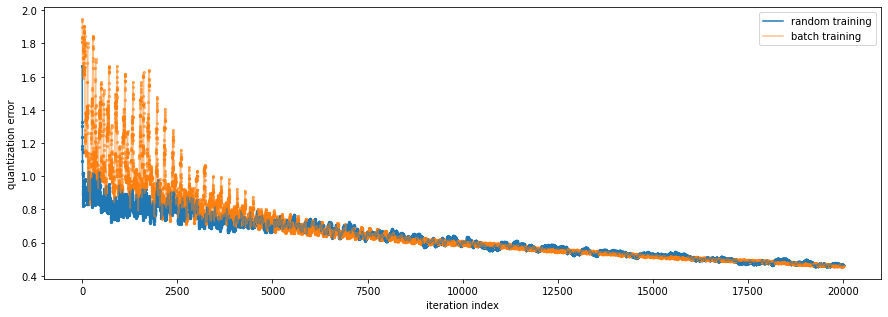

In [5]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(max_iter), q_error_r, label='random training')
plt.scatter(np.arange(max_iter), q_error_r, s=5)
plt.plot(np.arange(max_iter), q_error_b, label='batch training',alpha=0.5)
plt.scatter(np.arange(max_iter), q_error_b, s=5,alpha=0.5)
# plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('quantization error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

We see that for a small iteration number, the QE for batch training varies much more than for the random training, suggesting that the random training stabilizes faster than the batch training. 
After a certain iteration index, batch and random training gave simillar QEs, with batch traning being slightly more stable. 